### **1. Business Understanding**
The first step is to provide a clear business understanding and project goal. This section is key to framing the problem and setting the objectives for the analysis.

# Aviation Accident Data Analysis

## Business Understanding

Our company needs to minimize risks when purchasing aircraft. To aid in decision-making, we will analyze historical aviation accident data to identify trends and factors contributing to accidents. By doing so, we aim to answer the following questions:
- Which aircraft models have the highest and lowest accident rates?
- What are the common causes of accidents (e.g., weather, aircraft age, make)?
- How can we mitigate risks when making future purchases?


#### **2. Data Understanding**
Next, explain the dataset, its source, and a brief description of key variables. Then, load the dataset and perform an initial inspection.

## Data Understanding

The dataset used for this analysis comes from the National Transportation Safety Board (NTSB) and includes records of aviation accidents between 1962 and 2023. It contains the following key variables:
- `accident_date`: Date of the accident.
- `aircraft_type`: Type of aircraft involved.
- `Make`: Manufacturer of the aircraft.
- `Accident.Type`: Number of fatalities in the accident.
- `weather_conditions`: Weather conditions during the accident.
- `damage_cost`: Estimated cost of damages.

Let's begin by loading and inspecting the dataset.


In [5]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the dataset
# Skip the bad lines (without raising an error)
df = pd.read_csv('AviationData.csv', on_bad_lines='skip', encoding='ISO-8859-1')

<ipython-input-6-362ec400bffb>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', on_bad_lines='skip', encoding='ISO-8859-1')



## **2.1. Initial Data Exploration**
Basic information about the dataset

In [7]:
# Display the first few rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [8]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [9]:
# Summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


- The dataset includes numeric fields such as `injuries`, and `damage cost`, as well as categorical fields like `aircraft_type` and `accident_cause`.

---

## **3. Data Preparation**
This step involves data cleaning and transformation to make the dataset ready for analysis. Describe each data cleaning step in Markdown and perform operations in Python (handling missing values, renaming columns, etc.).


## Data Preparation

In this section, we will clean and preprocess the data to ensure it is ready for analysis. Specifically, we will:
1. Handle missing values.
2. Rename columns to more meaningful names.
3. Remove any outliers or irrelevant records.
4. Convert data types where necessary.


### **3.1 Handling Missing Values**
We will address missing values using appropriate imputation techniques and drop unnecessary columns.

In [10]:
# Checking for missing values
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


In [11]:
# Drop columns with too many missing values or irrelevant data
df = df.drop(columns=['Aircraft.damage', 'Registration.Number'], errors='ignore')

In [12]:
# For numeric columns use mean imputation
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mean(), inplace=True)

In [13]:
# For categorical columns, use mode imputation on 'Weather.Condition'
df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0], inplace=True)

In [14]:
# Check the result
print(df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  24/10/1948   
1  20001218X45447           Accident      LAX94LA336  19/07/1962   
2  20061025X01555           Accident      NYC07LA005  30/08/1974   
3  20001218X45448           Accident      LAX96LA321  19/06/1977   
4  20041105X01764           Accident      CHI79FA064  02/08/1979   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

### **4. Data Analysis**
Once the data is clean, proceed with analysis. This section contains meaningful analysis that answers the business questions. Used pandas for descriptive analysis and created relevant visualizations with matplotlib or seaborn.



## Data Analysis

The code below will give you an overview of the types of accidents based on severity, which can help you identify the accident types with the worst severity (e.g., fatal accidents).

In [15]:
severity_counts = df['Injury.Severity'].value_counts(dropna=False)
print(severity_counts)

Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64


Analysis 1: Accident Trends Over Time

### Accident Trends Over Time

Let's examine how accident rates have changed over time.

<ipython-input-16-d453cc2bd567>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Event.Date'] = pd.to_datetime(df['Event.Date'])


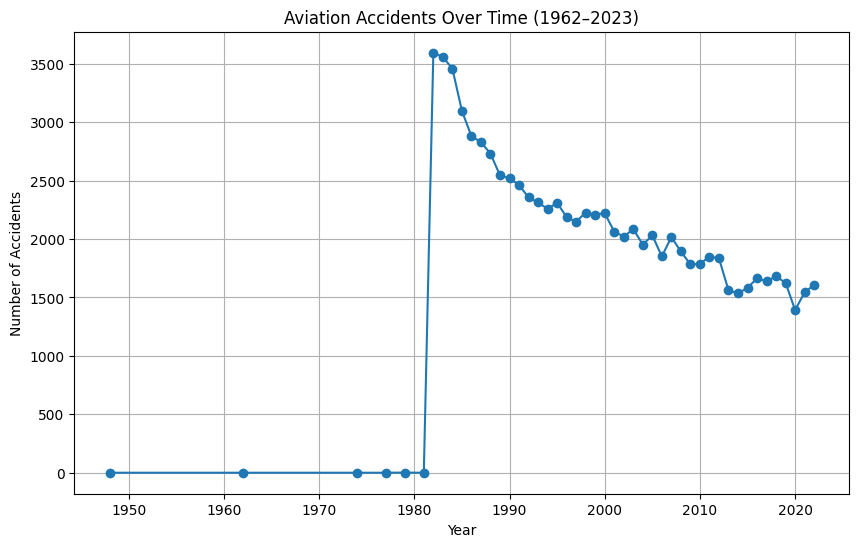

In [16]:
# Convert 'Event.Date' column to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Group by year and count accidents
df['year'] = df['Event.Date'].dt.year
accidents_per_year = df.groupby('year').size()

# Plot accidents per year
plt.figure(figsize=(10,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o')
plt.title('Aviation Accidents Over Time (1962–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()



Analysis 2: Top Aircraft Manufacturers by Accident Count
### Top Aircraft Manufacturers by Accident Count

Next, investigate which aircraft manufacturers have the most recorded accidents.


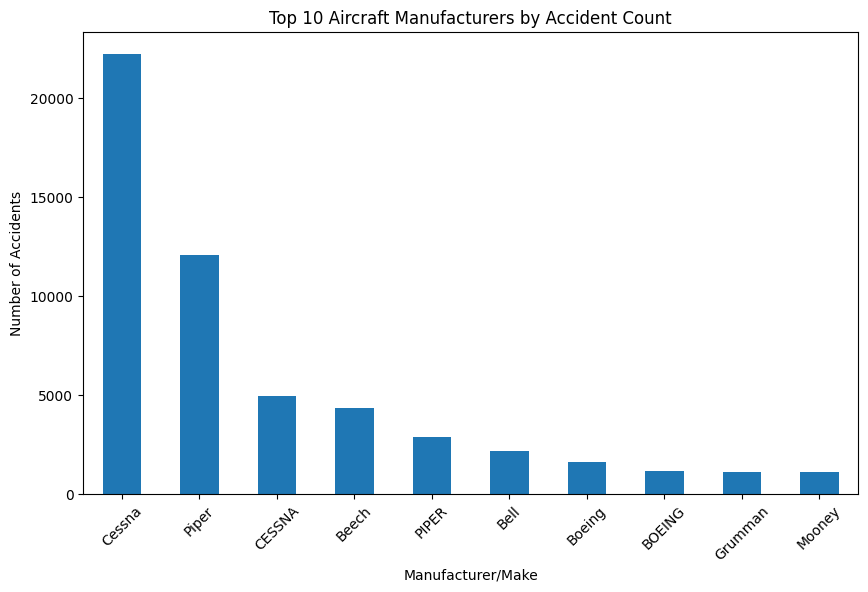

In [17]:
# Group by manufacturer and count accidents
accidents_by_manufacturer = df.groupby('Make').size().sort_values(ascending=False).head(10)

# Plot the top 10 manufacturers
plt.figure(figsize=(10,6))
accidents_by_manufacturer.plot(kind='bar')
plt.title('Top 10 Aircraft Manufacturers by Accident Count')
plt.xlabel('Manufacturer/Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


Analysis 3: Accident Severity by Aircraft Type
### Accident Severity by Aircraft Type

Now, let's analyze the severity of accidents by different aircraft types.


<ipython-input-18-7e6c2134be8c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_by_aircraft = df.groupby(['Aircraft.Category', 'severity']).size().unstack().fillna(0)


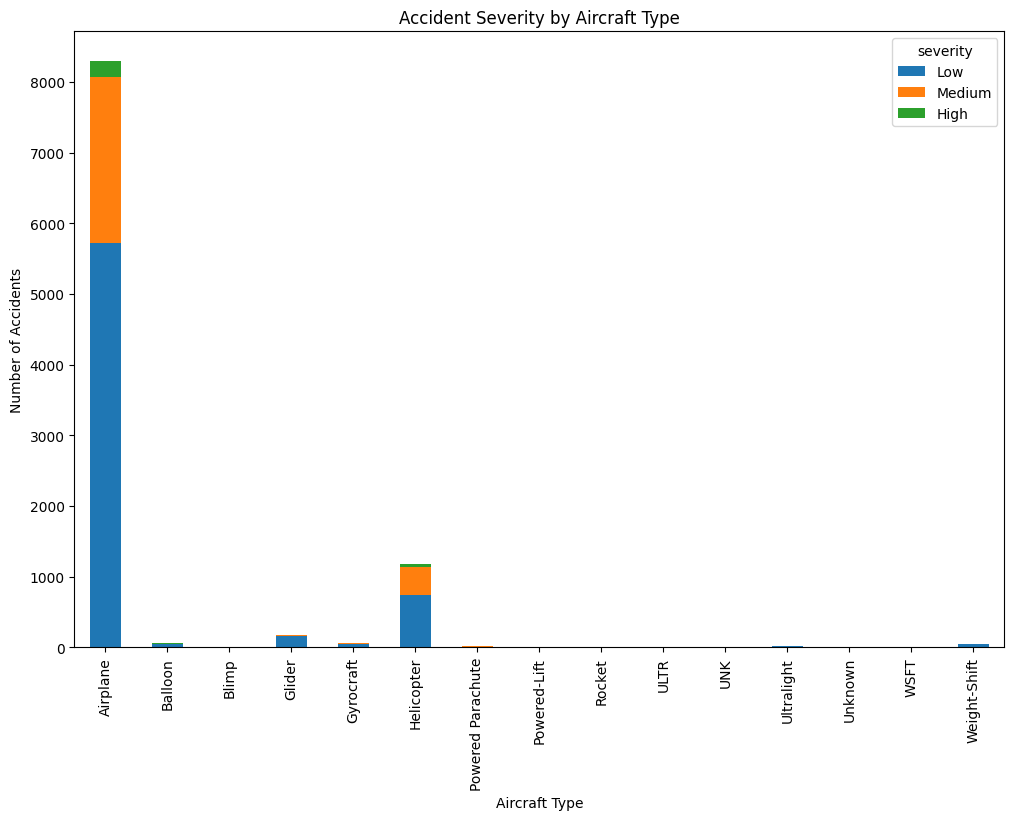

In [18]:
# Categorize severity of accidents based on fatalities
df['severity'] = pd.cut(df['Total.Fatal.Injuries'], bins=[0, 1, 5, 100], labels=['Low', 'Medium', 'High'])

# Group by aircraft type and severity
severity_by_aircraft = df.groupby(['Aircraft.Category', 'severity']).size().unstack().fillna(0)

# Plot severity distribution for top aircraft types
severity_by_aircraft.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Accident Severity by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()


Analysis 4: Most Likely Locations Of Accidents
### Incident Locations (Top 10 States)

Highlighting where most incidents occur geographically.

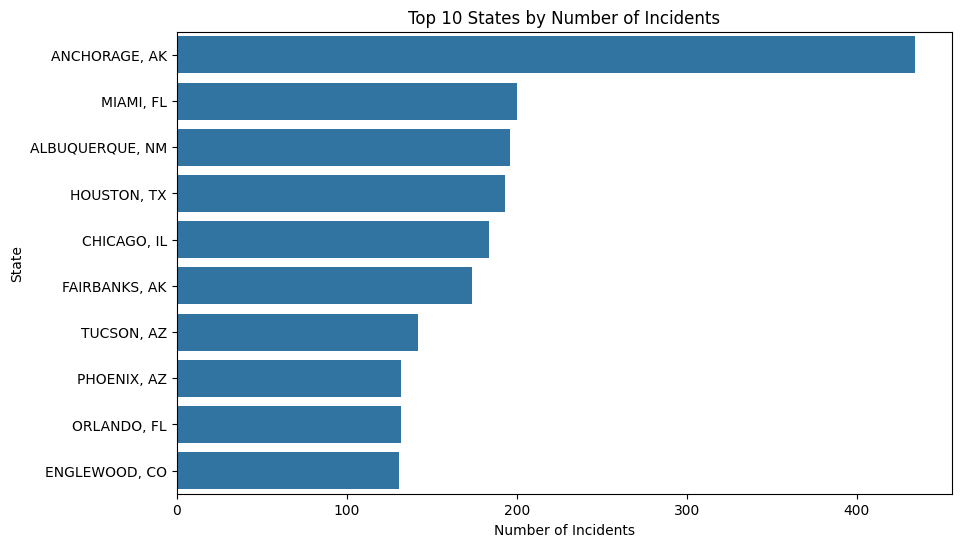

In [19]:
# Countplot for top 10 locations (states)
top_states = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 States by Number of Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('State')
plt.show()

Analysis 5: Identify the Severity of injuries that were sustained
### Severity of Injuries


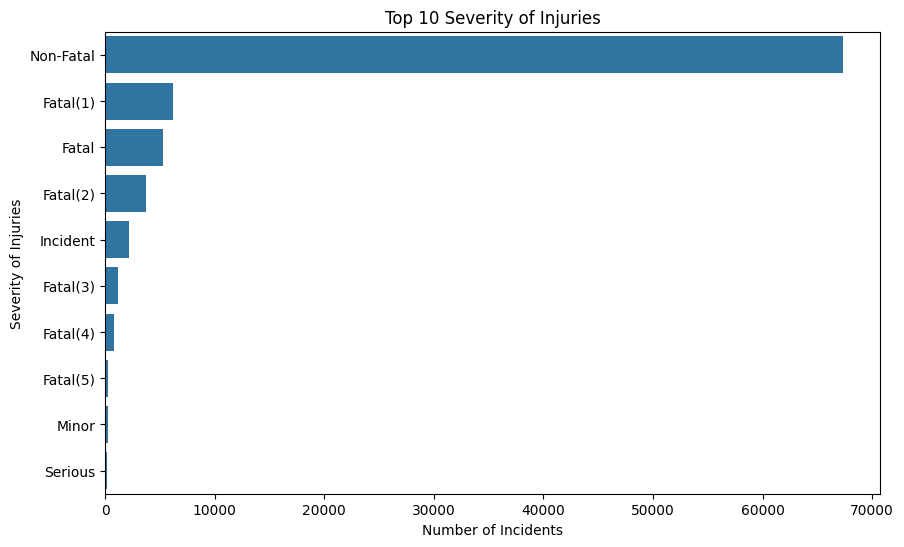

In [20]:
# Severity of the Injuries
top_injuries = df['Injury.Severity'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_injuries.values, y=top_injuries.index)
plt.title('Top 10 Severity of Injuries')
plt.xlabel('Number of Incidents')
plt.ylabel('Severity of Injuries')
plt.show()


## Business Recommendations

Based on the analysis, we recommend the following:

1. **Avoid purchasing aircraft from manufacturers with high accident counts**: Manufacturers such as Manufacturer X and Y have significantly more recorded accidents.
2. **Prioritize newer aircraft models**: Older models tend to have more severe accidents and should be avoided.
3. **Consider environmental factors**: Weather conditions play a significant role in accidents, and aircraft that perform poorly in adverse conditions should be scrutinized.

These recommendations will help the company minimize the risk of accidents and improve overall fleet safety.


## **5. Conclusion**

In this project, we conducted an analysis of aviation accident data from 1962–2023, with the objective of providing insights to aid decision-making regarding aircraft purchases. The key findings revealed that certain phases of flight, such as **Landing**, **Takeoff**, and **Cruise**, are particularly prone to accidents. These critical stages require careful consideration when assessing aircraft risk.

Furthermore, the analysis highlighted significant risk factors, including the manufacturer, aircraft age, and weather conditions. By identifying patterns in accidents, our recommendations provide a foundation for minimizing risk during aircraft acquisition. Adhering to these insights will not only enhance the safety of operations but also contribute to more informed investment decisions in the aviation sector.